In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("x_train.shape = {}".format(x_train.shape))
print("x_test.shape = {}".format(x_test.shape))
print("y_train.shape = {}".format(y_train.shape))
print("y_test.shape = {}".format(y_test.shape))


x_train.shape = (60000, 28, 28)
x_test.shape = (10000, 28, 28)
y_train.shape = (60000,)
y_test.shape = (10000,)


4


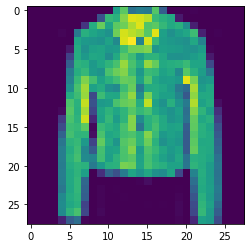

In [ ]:
print(y_test[10])
plt.imshow(x_test[10])

In [ ]:
print(type(x_train[20]))
print(type(x_test[20]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(set(y_train))
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


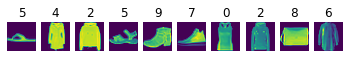

In [ ]:
import random

fig, axs = plt.subplots(1,10)

for ax in axs:
  i = random.randint(0,3000)
  ax.imshow(x_train[i])
  ax.axis("off")
  ax.set_title(y_train[i])


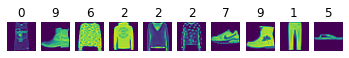

In [ ]:
fig, axs = plt.subplots(1,10)

for ax in axs:
  i = random.randint(0,3000)
  ax.imshow(x_test[i])
  ax.axis("off")
  ax.set_title(y_test[i])

In [ ]:
N_SAMPLES_TRAIN = x_train.shape[0]
N_SAMPLES_TEST = x_test.shape[0]
HEIGHT = x_train.shape[1]
WIDTH = x_train.shape[2]

x_train = x_train.reshape(N_SAMPLES_TRAIN, HEIGHT, WIDTH, 1)
x_test = x_test.reshape(N_SAMPLES_TEST, HEIGHT, WIDTH, 1)

print("new x_train.shape : {}".format(x_train.shape))
print("new x_test.shape : {}".format(x_test.shape))

x_train = x_train / 255.0
x_test = x_test / 255.0


new x_train.shape : (60000, 28, 28, 1)
new x_test.shape : (10000, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical

labels = ["T-shirt // top" , "Trouser" , "Pullover" , "Dress" , "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

print((y_train_ohe.shape))
print((y_test_ohe.shape))
print(y_train_ohe[random.randint(0,3000)])
print(y_test_ohe[random.randint(0,3000)])



(60000, 10)
(10000, 10)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, 3, padding = 'same', input_shape = (HEIGHT, WIDTH, 1), activation = "relu"))
model.add(MaxPool2D(padding = "same"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', activation = "relu"))
model.add(MaxPool2D(padding = "same"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', activation = "relu"))
model.add(MaxPool2D(padding = "same"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation = "softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0

In [ ]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [ ]:
callbacks = [EarlyStopping(patience= 10), ModelCheckpoint("model_1.h5"), ReduceLROnPlateau()]
history = model.fit(x = x_train, y= y_train_ohe, batch_size= 1024, epochs = 50, validation_split=0.2, callbacks=callbacks)

Epoch 1/50
47/47 [==============================] - 12s 58ms/step - loss: 0.7813 - accuracy: 0.7283 - val_loss: 2.0815 - val_accuracy: 0.2675 - lr: 0.0010
Epoch 2/50
47/47 [==============================] - 2s 38ms/step - loss: 0.4579 - accuracy: 0.8364 - val_loss: 2.1582 - val_accuracy: 0.1214 - lr: 0.0010
Epoch 3/50
47/47 [==============================] - 2s 38ms/step - loss: 0.3942 - accuracy: 0.8562 - val_loss: 2.2650 - val_accuracy: 0.2488 - lr: 0.0010
Epoch 4/50
47/47 [==============================] - 2s 38ms/step - loss: 0.3611 - accuracy: 0.8719 - val_loss: 2.2126 - val_accuracy: 0.2775 - lr: 0.0010
Epoch 5/50
47/47 [==============================] - 2s 38ms/step - loss: 0.3341 - accuracy: 0.8799 - val_loss: 1.9415 - val_accuracy: 0.3823 - lr: 0.0010
Epoch 6/50
47/47 [==============================] - 2s 38ms/step - loss: 0.3130 - accuracy: 0.8857 - val_loss: 1.7615 - val_accuracy: 0.3985 - lr: 0.0010
Epoch 7/50
47/47 [==============================] - 2s 38ms/step - loss: 0.

In [ ]:
scores = model.evaluate(x_test, y_test_ohe)
print("Accuracy = {} %".format(100 * scores[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9258
Accuracy = 92.58000254631042 %


32/32 [==============================] - 0s 4ms/step
0
T-shirt // top


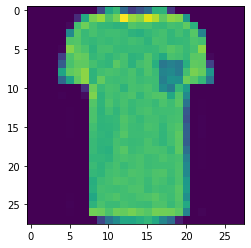

In [ ]:
import numpy as np
i = random.randint(0,1023)
plt.imshow(x_test[i].reshape(28,28))
results = model.predict(x_test[:1023])

print(np.argmax(results[i]))
print(labels[np.argmax(results[i])])


In [ ]:
model.load_weights("model_1.h5")
scores = model.evaluate(x_test, y_test_ohe)
print("Accuracy = {} %".format(100 * scores[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2209 - accuracy: 0.9258
Accuracy = 92.58000254631042 %


In [ ]:
print(history.params)
print(history.history)

{'verbose': 1, 'epochs': 50, 'steps': 47}
{'loss': [0.7812923789024353, 0.45789119601249695, 0.3941933214664459, 0.3611163794994354, 0.3341049551963806, 0.31302574276924133, 0.2948988378047943, 0.28073740005493164, 0.27548548579216003, 0.26004552841186523, 0.25917717814445496, 0.25009167194366455, 0.23888744413852692, 0.23810793459415436, 0.22893981635570526, 0.22597770392894745, 0.2228299379348755, 0.21500100195407867, 0.21072013676166534, 0.20900408923625946, 0.20413503050804138, 0.2008524388074875, 0.1966077834367752, 0.1901579201221466, 0.1885630041360855, 0.18749725818634033, 0.18568675220012665, 0.18244265019893646, 0.1809656172990799, 0.16993162035942078, 0.17390815913677216, 0.17182154953479767, 0.16933469474315643, 0.16806845366954803], 'accuracy': [0.7283124923706055, 0.8363541960716248, 0.856166660785675, 0.871916651725769, 0.8799166679382324, 0.885729193687439, 0.8922083377838135, 0.8974166512489319, 0.8993541598320007, 0.9039999842643738, 0.9046666622161865, 0.907083332538

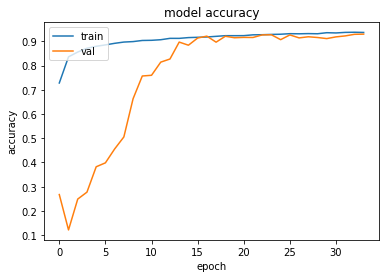

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

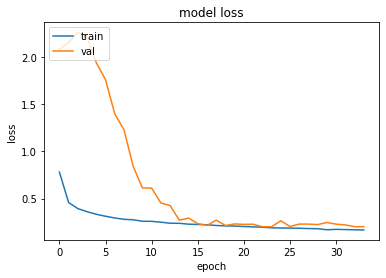

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()